<a href="https://colab.research.google.com/github/Reis25/Analytics/blob/master/LISTA_1_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lista de Exercícios: Árvore de Decisão – Parte 1

Disciplina: Aprendizagem de Máquina, PPGI

Professores: Evandro Costa.

Período: 2025.2


1) Considere a base de dados seguinte, supostamente fornecida pelo “gerente do  banco”, realizando nela a seguinte ampliação:

 (I) Aumenta-la para que contenha:
 - 6 atributos;
 - 30 entradas (E15, E16, …,  E30).
  
com a adição de 16 exemplos, distribuídos entre:
- Risco = Baixo;
- Risco  = Alto;
- Risco = Moderado.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log
import seaborn as sns

file = 'tabela_credito.csv'

df = pd.read_csv(file)

print(df.head())

print(f"\n\n Quantidade de entradas da base de dados: {len(df)}")

   ID Historia de Credito Divida Garantia          Renda     Risco
0  E1                Ruim   Alta  Nenhuma      $0 a $15k      Alto
1  E2        Desconhecida   Alta  Nenhuma     $15 a $35k      Alto
2  E3        Desconhecida  Baixa  Nenhuma     $15 a $35k  Moderado
3  E4        Desconhecida  Baixa  Nenhuma      $0 a $15k      Alto
4  E5        Desconhecida  Baixa  Nenhuma  Acima de $35k     Baixo


 Quantidade de entradas da base de dados: 14


In [30]:
import random

# Definir as categorias de tempo de emprego
categorias_tempo_emprego = [
    'Menos de 1 ano',
    '1-3 anos',
    '3-5 anos',
    'Mais de 5 anos'
]

# Adicionar coluna com valores aleatórios
# Usar seed para reprodutibilidade (opcional - pode remover se quiser valores diferentes a cada execução)
random.seed(42)
df['Tempo de Emprego'] = [random.choice(categorias_tempo_emprego) for _ in range(len(df))]

print(f"\nPrimeiras linhas do arquivo atualizado:")
print(df.head(10))
print(f"\nDistribuição do Tempo de Emprego:")
print(df['Tempo de Emprego'].value_counts().sort_index())


Primeiras linhas do arquivo atualizado:
    ID Historia de Credito Divida  Garantia          Renda     Risco  \
0   E1                Ruim   Alta   Nenhuma      $0 a $15k      Alto   
1   E2        Desconhecida   Alta   Nenhuma     $15 a $35k      Alto   
2   E3        Desconhecida  Baixa   Nenhuma     $15 a $35k  Moderado   
3   E4        Desconhecida  Baixa   Nenhuma      $0 a $15k      Alto   
4   E5        Desconhecida  Baixa   Nenhuma  Acima de $35k     Baixo   
5   E6        Desconhecida  Baixa  Adequada  Acima de $35k     Baixo   
6   E7                Ruim  Baixa   Nenhuma      $0 a $15k      Alto   
7   E8                Ruim  Baixa  Adequada  Acima de $35k  Moderado   
8   E9                 Boa  Baixa   Nenhuma  Acima de $35k     Baixo   
9  E10                 Boa   Alta  Adequada  Acima de $35k     Baixo   

  Tempo de Emprego  
0   Menos de 1 ano  
1   Menos de 1 ano  
2         3-5 anos  
3         1-3 anos  
4         1-3 anos  
5         1-3 anos  
6   Menos de 1 ano 

In [31]:

categorias = {
    'Historia de Credito': ['Ruim', 'Desconhecida', 'Boa'],
    'Divida': ['Alta', 'Baixa'],
    'Garantia': ['Nenhuma', 'Adequada'],
    'Renda': ['$0 a $15k', '$15 a $35k', 'Acima de $35k'],
    'Risco': ['Alto', 'Moderado', 'Baixo', 'baixo'],
    'Tempo de Emprego': ['Menos de 1 ano', '1-3 anos', '3-5 anos', 'Mais de 5 anos']
}


linhas_atuais = len(df)
linhas_necessarias = 30 - linhas_atuais

print(f"Base atual: {linhas_atuais} linhas")
print(f"Adicionando: {linhas_necessarias} novas linhas")
print(f"Total final: 30 linhas\n")


novas_linhas = []
for i in range(linhas_necessarias):
    nova_linha = {
        'ID': f'E{linhas_atuais + i + 1}',
        'Historia de Credito': random.choice(categorias['Historia de Credito']),
        'Divida': random.choice(categorias['Divida']),
        'Garantia': random.choice(categorias['Garantia']),
        'Renda': random.choice(categorias['Renda']),
        'Risco': random.choice(categorias['Risco']),
        'Tempo de Emprego': random.choice(categorias['Tempo de Emprego'])
    }
    novas_linhas.append(nova_linha)

# Criar DataFrame com as novas linhas
df_novas = pd.DataFrame(novas_linhas)

# Concatenar com o DataFrame original
df_expandido = pd.concat([df, df_novas], ignore_index=True)

df_expandido.head()


Base atual: 14 linhas
Adicionando: 16 novas linhas
Total final: 30 linhas



,ID,Historia de Credito,Divida,Garantia,Renda,Risco,Tempo de Emprego
0,E1,Ruim,Alta,Nenhuma,$0 a $15k,Alto,Menos de 1 ano
1,E2,Desconhecida,Alta,Nenhuma,$15 a $35k,Alto,Menos de 1 ano
2,E3,Desconhecida,Baixa,Nenhuma,$15 a $35k,Moderado,3-5 anos
3,E4,Desconhecida,Baixa,Nenhuma,$0 a $15k,Alto,1-3 anos
4,E5,Desconhecida,Baixa,Nenhuma,Acima de $35k,Baixo,1-3 anos


In [32]:
df = df_expandido

# (II) A partir da base de dados ampliada, conforme feito em (I):
* construa  *“manualmente”* as 3 árvores de decisão( ID3, C4.5 e CART).


 *   **Esse item servirá como resposta para a questão 2, inclusive.**

In [33]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['Historia de Credito'] = Le.fit_transform(df['Historia de Credito'])
df['Divida'] = Le.fit_transform(df['Divida'])
df['Garantia'] = Le.fit_transform(df['Garantia'])
df['Renda'] = Le.fit_transform(df['Renda'])
df['Risco'] = Le.fit_transform(df['Risco'])
df['Tempo de Emprego'] = Le.fit_transform(df['Tempo de Emprego'])

y = df['Risco']
X = df.drop(columns =['ID','Risco'], axis=1)

In [34]:
y
X

,Historia de Credito,Divida,Garantia,Renda,Tempo de Emprego
0,2,0,1,0,3
1,1,0,1,1,3
2,1,1,1,1,1
3,1,1,1,0,0
4,1,1,1,2,0
5,1,1,0,2,0
6,2,1,1,0,3
7,2,1,0,2,3
8,0,1,1,2,2
9,0,0,0,2,3


In [35]:
# Fitting the model
from sklearn import tree

# criterion = 'entropy' calcula a árvore de decisão pelo ID3
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

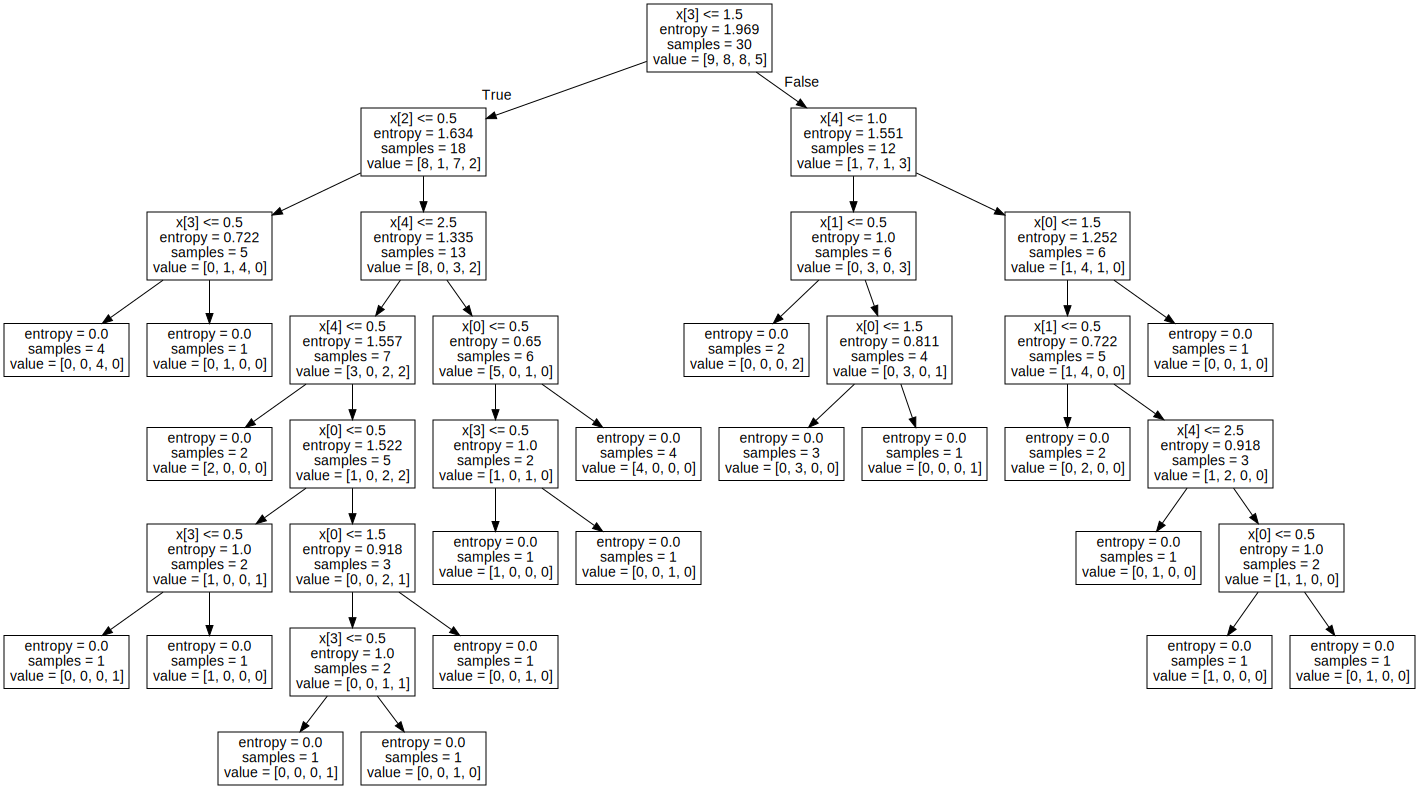

In [36]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [37]:
# Fitting the model
from sklearn import tree

# Deixar sem parametro por default temos uma classificação pelo C4.5
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [38]:
# Fitting the model
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(X, y)

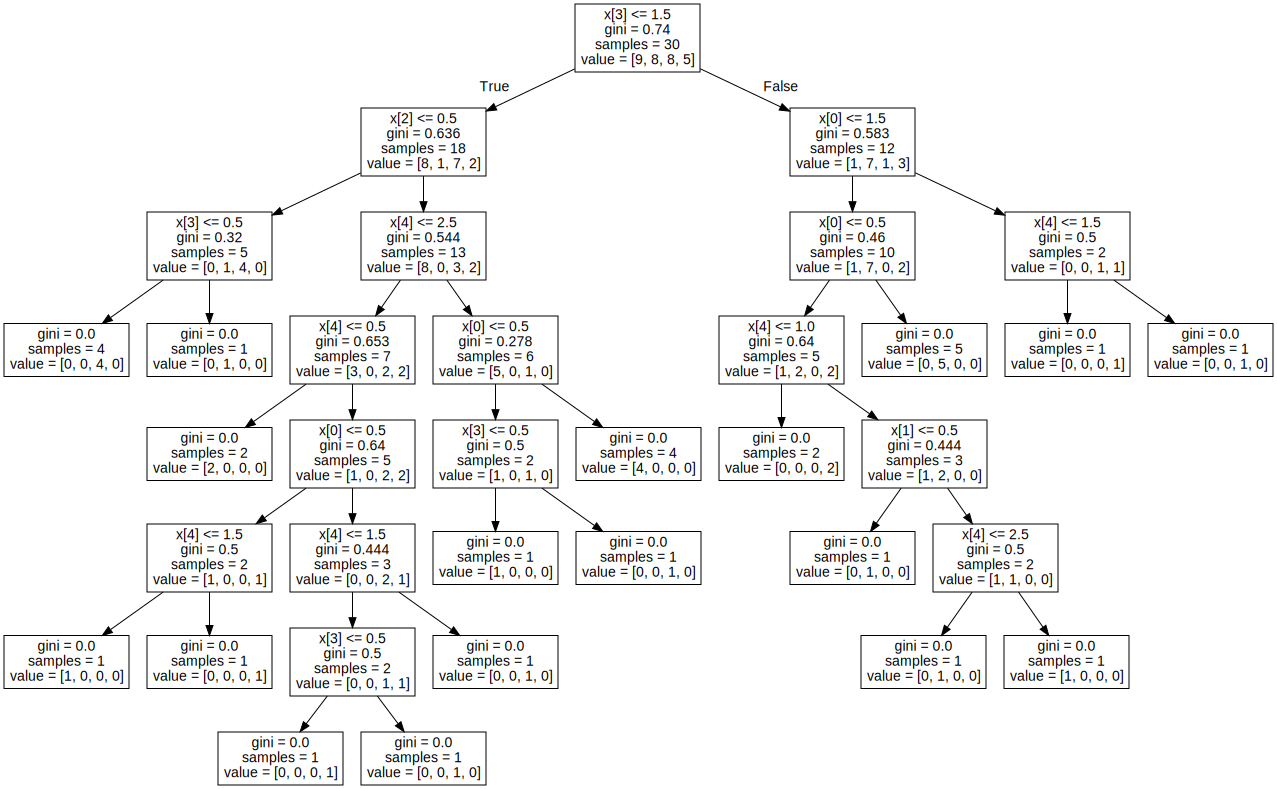

In [39]:
dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph1 = graphviz.Source(dot_data2)
graph1


No algoritmo ID3, calculamos ganhos para cada atributo. Aqui, precisamos calcular as taxas de ganho em vez de ganhos.

taxaDeGanho (A) = Ganho (A) / SplitInfo (A)

SplitInfo (A) = -∑ | Dj | / | D | x log2 | Dj | / | D |

Daí aplica-se em todos os atributos da árvore e pega a maior taxa e constroi de forma sequencial com as inferências.

In [40]:
from sklearn import tree

# criterion = 'gini' calcula a árvore de decisão pelo CART (Classification and Regression Trees)
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X, y)

In [41]:
# Fitting the model
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(X, y)

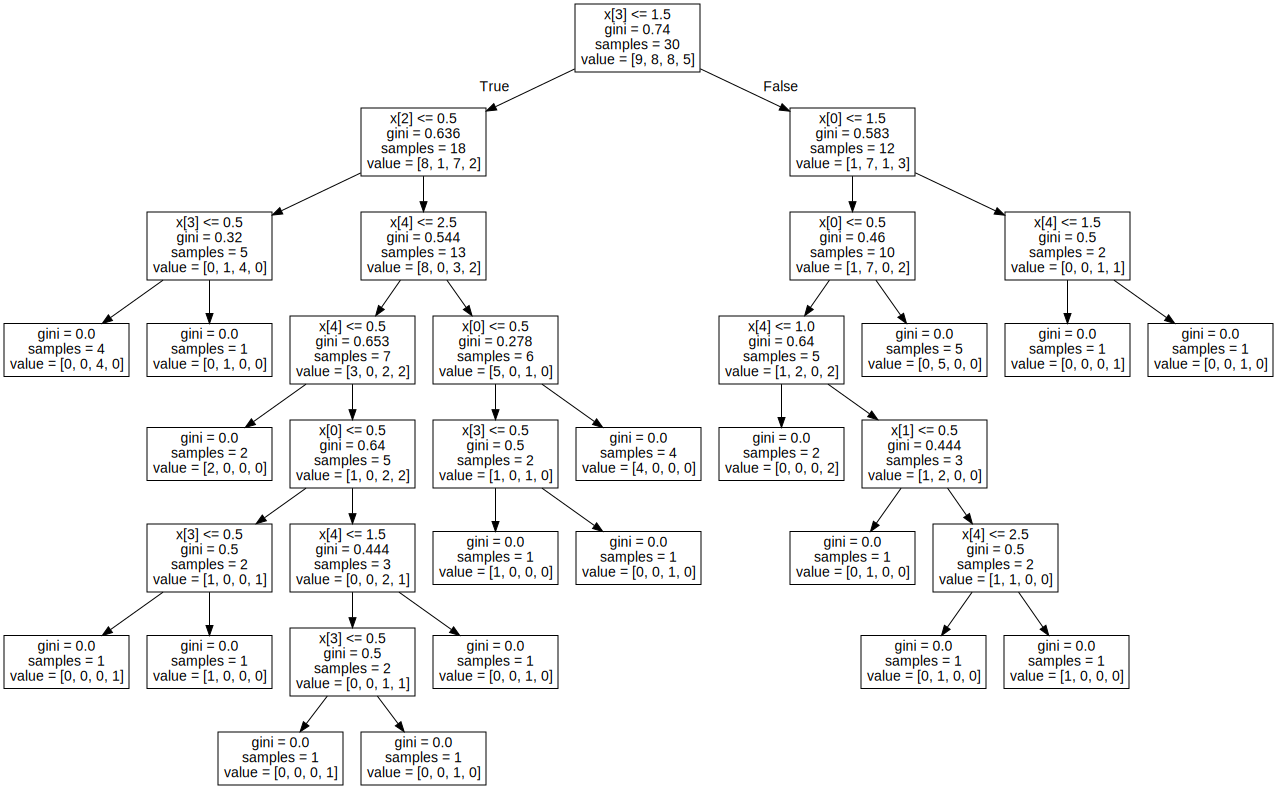

In [42]:
dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph1 = graphviz.Source(dot_data2)
graph1

# (III) De cada uma das 3 árvores de decisão obtidas em (II), extraia e apresente  as respectivas bases de conhecimento com regras do tipo SE...ENTÃO…

Para um novo cliente, a árvore sugere o seguinte processo de análise:


PASSO 1: Avaliar a RENDA:

   → Se < 35k: Verificar garantias e estabilidade.

   → Se ≥ 35k: Caminho mais promissor para aprovação.

PASSO 2a (Renda baixa/média):

   → TEM garantia adequada? → Risco reduz significativamente

   → NÃO tem garantia? → Avaliar tempo de emprego e história

PASSO 2b (Renda alta):

   → Tempo de emprego curto + Dívida alta? → Ainda aceitável
   
   → Tempo longo? → Avaliar história de crédito para refinamento

PASSO 3: Decisão final considerando todos os fatores em conjunto

**RECOMENDAÇÃO ESTRATÉGICA:**
Para reduzir risco de clientes de renda baixa/média:
1. PRIORIZAR exigência de garantias adequadas
2. Dar preferência a tempo de emprego > 5 anos
3. Evitar aprovação quando: sem garantia + tempo curto + renda baixa

# (IV) Compare as 3 bases de regras e selecione, justificando sua escolha, a que  você julga mais apropriada para ser a base de conhecimento a ser usada na  solução do problema de análise de risco de crédito, discutido em sala de  aula.

Basicamente todos os problemas resolvíveis com o ID3 podem ser resolvidos com o C4.5, a diferença formal entre eles é que ao invez de ganho como usa o ID3 ele (o C4.5) usa taxa de ganho , dessa forma evita o overfitting. No mais o tratamento de dados é feito da mesmA FORMA.

# 3) Considerando uma das 3 base de dados menionadas a seguir, que você vai localizar no Kaggle, sobre os domínios de aplicação, Faça:



*   Gere e apresente uma árvore de decisão e as regras correspondentes.
*   avaliação de desempenho usando a métrica de acurácia e,
caso queira, veja e apresente outras métricas (apresente a matriz de confusão).

*  Na base de dados escolhida, rode um algoritmo que gera regras
diretamente, por exemplo o algoritmo PRISM ou o Ripper.

* Apresente a base de dados com as regras geradas, também mostrando métricas de desempenho.


In [43]:
import numpy as np
import pandas as pd
import matplotlib as plt
from math import log

url2 = 'play_tennis.csv'

data_frame = pd.read_csv(url2)

data_frame.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTenis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [44]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data_frame['Outlook'] = Le.fit_transform(data_frame['Outlook'])
data_frame['Temperature'] = Le.fit_transform(data_frame['Temperature'])
data_frame['Humidity'] = Le.fit_transform(data_frame['Humidity'])
data_frame['Wind'] = Le.fit_transform(data_frame['Wind'])
data_frame['PlayTenis'] = Le.fit_transform(data_frame['PlayTenis'])

In [45]:
data_frame = data_frame.drop(['Day'], axis=1)

In [46]:
data_frame.head()

,Outlook,Temperature,Humidity,Wind,PlayTenis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [47]:
y = data_frame['PlayTenis']

X = data_frame.drop(['PlayTenis'], axis=1)

In [48]:
X


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [49]:
y

,PlayTenis
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [50]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

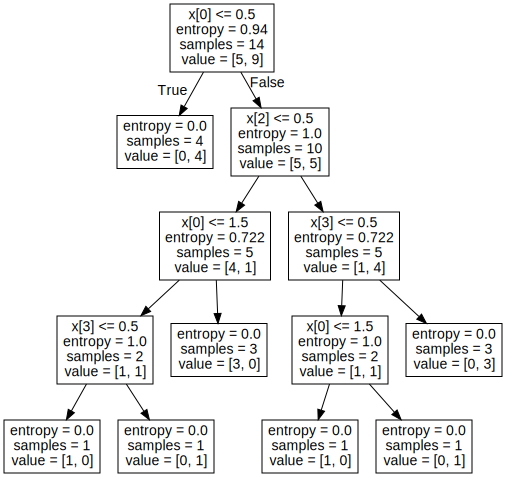

In [51]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

X[0] -> Outlook

X[1] -> Temperature

X[2] -> Humidity

X[3] -> Wind

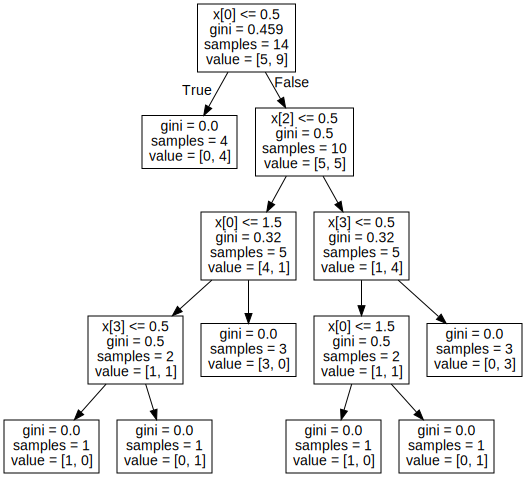

In [52]:
# Fitting the model
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y)

dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph1 = graphviz.Source(dot_data2)
graph1

In [53]:
# Verificando a construção
X_pred = y

No algoritmo ID3, calculamos ganhos para cada atributo. Aqui, precisamos calcular as taxas de ganho em vez de ganhos.

taxaDeGanho (A) = Ganho (A) / SplitInfo (A)

SplitInfo (A) = -∑ | Dj | / | D | x log2 | Dj | / | D |

Daí aplica-se em todos os atributos da árvore e pega a maior taxa e constroi de forma sequencial com as inferências.

Basicamente todos os problemas resolvíveis com o ID3 podem ser resolvidos com o C4.5, a diferença formal entre eles é que ao invez de ganho como usa o ID3 ele (o C4.5) usa taxa de ganho , dessa forma evita o overfitting.

Temos 14 instâncias totais: 9 instâncias de SIM 5 instâncias de NÃO. Com as contagens de frequência de cada classe única, podemos calcular a entropia anterior desse conjunto de dados em que:

p = número de instâncias positivas (por exemplo, número de instâncias de tênis)

n = número de instâncias negativas (por exemplo, número de pessoas que não jogam tênis)

= -[(p/(p+n))log2(p/(p+n)) + (n/(p+n))log2(n/(p+n))]

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(9/(9+5))log2(9/(9+5)) + -(5/(9+5))log2(5/(9+5))

= -(9/(9+5))log2(9/(9+5)) + -(5/(9+5))log2(5/(9+5))

= 0.9403

2- Calculando o ganho de informação em cada atributo:

= (5/14)Isunny(p,n) + (4/14)Iovercast(p,n) + (5/14)*Irainy(p,n)

Isunny(p,n)

= I(2,3)

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(2/(2+3))log2(2/(2+3)) + -(3/(2+3))log2(3/(2+3))

= 0.9710

Iovercast(p,n)

= I(4,0)

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(4/(4+0))log2(4/(4+0)) + -(0/(4+0))log2(0/(4+0))

= 0

Irainy(p,n)

= I(3,2)

= -(p/(p+n))log2(p/(p+n)) + -(n/(p+n))log2(n/(p+n))

= -(3/(3+2))log2(3/(3+2)) + -(2/(3+2))log2(2/(3+2))

= 0.9710

Calculando a entropia para o Outlook =

= [Soma ponderada das pontuações de entropia de cada subconjunto de valor de atributo]

= (5/14)Isunny(p,n) + (4/14)Iovercast(p,n) + (5/14)*Irainy(p,n)

= (5/14) (0.9710) + (4/14) 0 + (5/14) * (0.9710)

= 0.6936

Daí a entropia resultante é dada por:

= 0.9403 – 0.6936

= 0.246

Entropia para Temperature = 0.911

Entropia para Humidity = 0.789

Entropia para Wind = 0.892

Ganho de informação para o atributo: Temperature = 0.9403 – 0.911 = 0.0293

Ganho de informação para o atributo: Humidity = 0.9403 – 0.789 = 0.1513

Ganho de informação para o atributo: Wind = 0.9403 – 0.892 = 0.0483

Previsões realizadas para 14 exemplos

Interpretação:
  • O modelo acertou 85.71% das previsões
  • De 14 exemplos, acertou 12
  • Errou 2 exemplos

Matriz de Confusão (formato numérico):
--------------------------------------------------
[[5 0]
 [2 7]]


Matriz de Confusão (formato tabela):
--------------------------------------------------
         Previsto: 0  Previsto: 1
Real: 0            5            0
Real: 1            2            7

✅ Matriz de confusão salva: matriz_confusao.png


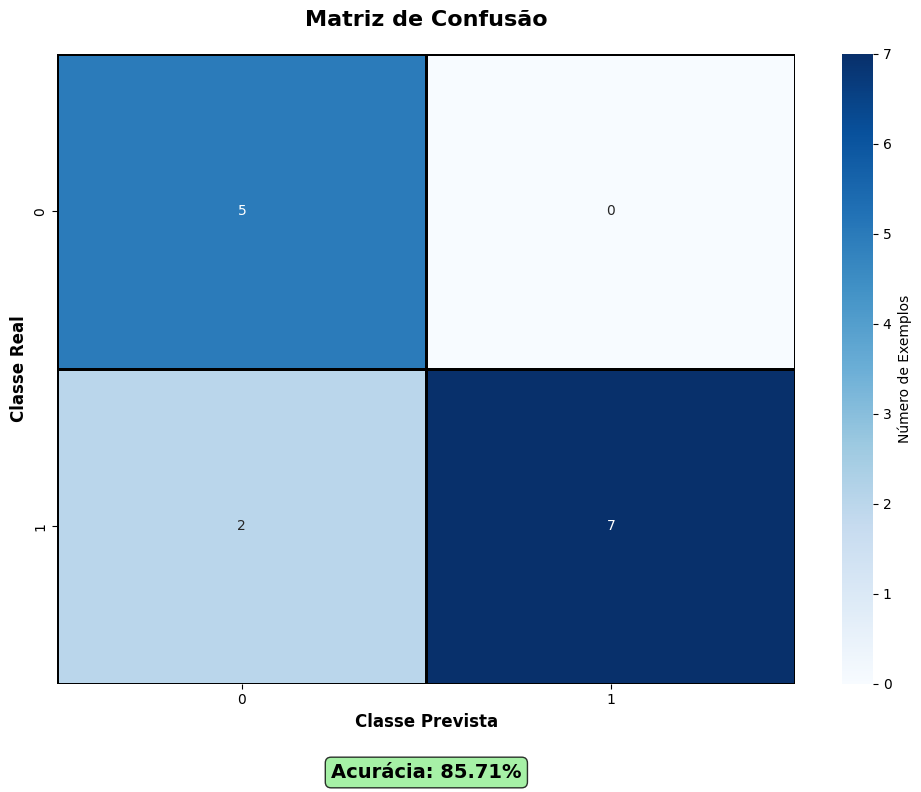

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Criar e treinar modelo
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X, y)

y_pred = clf.predict(X)

print(f"Previsões realizadas para {len(y_pred)} exemplos")

acuracia = accuracy_score(y, y_pred)

print(f"\nInterpretação:")
print(f"  • O modelo acertou {acuracia:.2%} das previsões")
print(f"  • De {len(y)} exemplos, acertou {int(acuracia * len(y))}")
print(f"  • Errou {len(y) - int(acuracia * len(y))} exemplos")


# Calcular matriz de confusão
cm = confusion_matrix(y, y_pred)

# Obter labels únicos
labels = sorted(y.unique())

print("\nMatriz de Confusão (formato numérico):")
print("-" * 50)
print(cm)

print("\n\nMatriz de Confusão (formato tabela):")
print("-" * 50)

# Criar DataFrame para visualização melhor
cm_df = pd.DataFrame(cm,
                     index=[f"Real: {label}" for label in labels],
                     columns=[f"Previsto: {label}" for label in labels])
print(cm_df)

plt.figure(figsize=(10, 8))

# Criar heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar_kws={'label': 'Número de Exemplos'},
            linewidths=2, linecolor='black')

plt.title('Matriz de Confusão', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Classe Real', fontsize=12, fontweight='bold')
plt.xlabel('Classe Prevista', fontsize=12, fontweight='bold')

# Adicionar texto explicativo
plt.text(0.5, -0.15, f'Acurácia: {acuracia:.2%}',
         ha='center', transform=plt.gca().transAxes,
         fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.savefig('matriz_confusao.png', dpi=300, bbox_inches='tight')
print("\n✅ Matriz de confusão salva: matriz_confusao.png")


1. Carregando dados de Play Tennis...
Dataset carregado: 14 exemplos

Distribuição das classes:
PlayTennis
Yes    9
No     5
Name: count, dtype: int64

Features: ['Outlook', 'Temperature', 'Humidity', 'Wind']
Target: PlayTennis

Iniciando PRISM com 14 exemplos e 2 classes
Classes: ['No' 'Yes']
Features: ['Outlook', 'Temperature', 'Humidity', 'Wind']


>>> Aprendendo regras para classe: No
--------------------------------------------------------------------------------

  Iteração 1: 5 exemplos não cobertos
    → Adicionada condição: Outlook=Sunny (p=0.60)
    → Adicionada condição: Temperature=Hot (p=1.00)
  ✓ Regra aprendida: IF Outlook=Sunny AND Temperature=Hot THEN No [confidence: 1.00, coverage: 2]

  Iteração 2: 3 exemplos não cobertos
    → Adicionada condição: Outlook=Rain (p=0.40)
    → Adicionada condição: Wind=Strong (p=1.00)
  ✓ Regra aprendida: IF Outlook=Rain AND Wind=Strong THEN No [confidence: 1.00, coverage: 2]

  Iteração 3: 1 exemplos não cobertos
    → Adicionada co

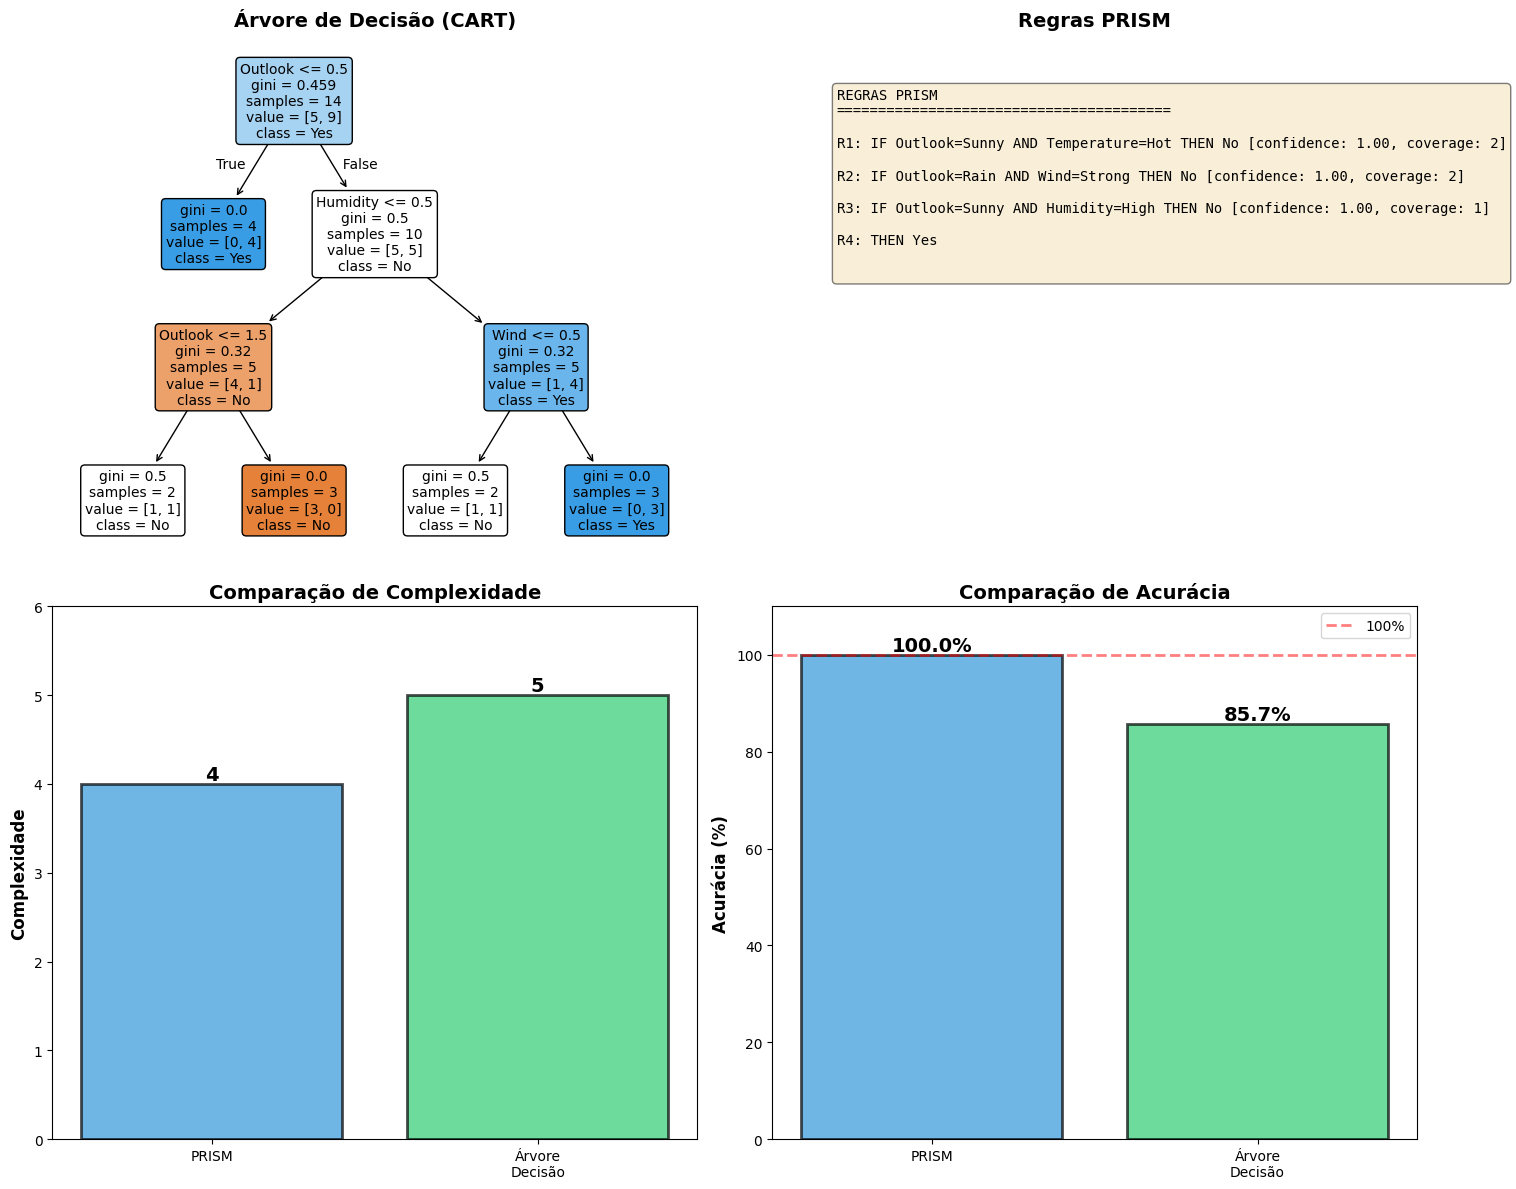

In [55]:
"""
Implementação Completa do Algoritmo PRISM
Incluindo visualização, comparação com árvores e métricas
"""

import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. CLASSE PRISM

class Rule:
    """Representa uma regra de classificação"""
    def __init__(self, target_class):
        self.conditions = []  # Lista de (atributo, valor)
        self.target_class = target_class
        self.confidence = 0.0
        self.coverage = 0

    def add_condition(self, attribute, value):
        self.conditions.append((attribute, value))

    def applies(self, example):
        """Verifica se a regra se aplica a um exemplo"""
        for attr, val in self.conditions:
            if example[attr] != val:
                return False
        return True

    def __str__(self):
        if not self.conditions:
            return f"THEN {self.target_class}"

        conditions_str = " AND ".join([f"{attr}={val}" for attr, val in self.conditions])
        return f"IF {conditions_str} THEN {self.target_class} " \
               f"[confidence: {self.confidence:.2f}, coverage: {self.coverage}]"

    def __repr__(self):
        return self.__str__()


class PRISM:
    """Implementação do algoritmo PRISM"""

    def __init__(self, verbose=True):
        self.rules = []
        self.verbose = verbose
        self.target_attr = None
        self.feature_names = None

    def fit(self, X, y, feature_names=None):
        # Converter para DataFrame se necessário
        if not isinstance(X, pd.DataFrame):
            if feature_names is None:
                feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
            X = pd.DataFrame(X, columns=feature_names)

        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')

        self.feature_names = X.columns.tolist()
        self.target_attr = y.name

        # Combinar X e y para facilitar manipulação
        data = X.copy()
        data[self.target_attr] = y.values

        # Obter classes únicas
        classes = y.unique()

        if self.verbose:
            print(f"\nIniciando PRISM com {len(data)} exemplos e {len(classes)} classes")
            print(f"Classes: {classes}")
            print(f"Features: {self.feature_names}")
            print("\n" + "=" * 80)

        # Para cada classe
        for target_class in classes:
            if self.verbose:
                print(f"\n>>> Aprendendo regras para classe: {target_class}")
                print("-" * 80)

            # Exemplos não cobertos desta classe
            uncovered = data[data[self.target_attr] == target_class].copy()
            iteration = 1

            # Enquanto existirem exemplos não cobertos
            while len(uncovered) > 0:
                if self.verbose:
                    print(f"\n  Iteração {iteration}: {len(uncovered)} exemplos não cobertos")

                # Aprender uma regra
                rule = self._learn_rule(data, target_class)

                if rule is None:
                    break

                # Calcular confiança e cobertura
                covered_examples = self._get_covered_examples(data, rule)
                rule.coverage = len(covered_examples)
                correct = covered_examples[covered_examples[self.target_attr] == target_class]
                rule.confidence = len(correct) / len(covered_examples) if len(covered_examples) > 0 else 0

                # Adicionar regra
                self.rules.append(rule)

                if self.verbose:
                    print(f"  ✓ Regra aprendida: {rule}")

                # Remover exemplos cobertos
                covered_indices = covered_examples.index
                uncovered = uncovered[~uncovered.index.isin(covered_indices)]

                # Remover também do dataset global para não reusar
                data = data[~data.index.isin(covered_indices)]

                iteration += 1

        if self.verbose:
            print("\n" + "=" * 80)
            print(f"PRISM concluído! Total de regras: {len(self.rules)}")

        return self

    def _learn_rule(self, data, target_class):
        """Aprende uma única regra para a classe alvo"""
        rule = Rule(target_class)
        current_data = data.copy()

        # Enquanto a regra cobre exemplos de outras classes
        while True:
            # Verificar se só restam exemplos da classe alvo
            classes_in_data = current_data[self.target_attr].unique()
            if len(classes_in_data) == 1 and classes_in_data[0] == target_class:
                break

            if len(current_data) == 0:
                return None

            # Encontrar melhor condição
            best_attr = None
            best_value = None
            best_prob = 0

            for attr in self.feature_names:
                for value in current_data[attr].unique():
                    # Exemplos que satisfazem attr=value
                    subset = current_data[current_data[attr] == value]

                    # Calcular p(target_class | attr=value)
                    n_target = len(subset[subset[self.target_attr] == target_class])
                    n_total = len(subset)

                    prob = n_target / n_total if n_total > 0 else 0

                    if prob > best_prob:
                        best_prob = prob
                        best_attr = attr
                        best_value = value

            if best_attr is None:
                break

            # Adicionar condição à regra
            rule.add_condition(best_attr, best_value)

            if self.verbose:
                print(f"    → Adicionada condição: {best_attr}={best_value} " \
                      f"(p={best_prob:.2f})")

            # Filtrar dados
            current_data = current_data[current_data[best_attr] == best_value]

        return rule

    def _get_covered_examples(self, data, rule):
        """Retorna exemplos cobertos por uma regra"""
        mask = pd.Series([True] * len(data), index=data.index)
        for attr, val in rule.conditions:
            mask &= (data[attr] == val)
        return data[mask]

    def predict(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)

        predictions = []

        for idx, example in X.iterrows():
            prediction = None

            # Procurar primeira regra que se aplica
            for rule in self.rules:
                if rule.applies(example):
                    prediction = rule.target_class
                    break

            # Se nenhuma regra se aplica, usar classe mais comum (default)
            if prediction is None:
                # Usar a classe da última regra como default
                prediction = self.rules[-1].target_class if self.rules else None

            predictions.append(prediction)

        return np.array(predictions)

    def print_rules(self):
        """Imprime todas as regras de forma formatada"""
        print("\n" + "=" * 80)
        print("REGRAS APRENDIDAS PELO PRISM")
        print("=" * 80)
        for i, rule in enumerate(self.rules, 1):
            print(f"\nRegra {i}:")
            print(f"  {rule}")
        print("\n" + "=" * 80)



print("\n1. Carregando dados de Play Tennis...")

data_dict = {
    'Day': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
            'D11', 'D12', 'D13', 'D14'],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain',
                'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast',
                'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                    'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
                   'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data_dict)

print(f"Dataset carregado: {len(df)} exemplos")
print(f"\nDistribuição das classes:")
print(df['PlayTennis'].value_counts())

# Preparar features e target
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['PlayTennis']

print(f"\nFeatures: {list(X.columns)}")
print(f"Target: {y.name}")


prism = PRISM(verbose=True)
prism.fit(X, y)

# Imprimir regras
prism.print_rules()


y_pred = prism.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"\nAcurácia no conjunto de treinamento: {accuracy:.2%}")

print("\nRelatório de Classificação:")
print(classification_report(y, y_pred, target_names=['No', 'Yes']))


results = df.copy()
results['Previsto'] = y_pred
results['Correto'] = results['PlayTennis'] == results['Previsto']

print(results[['Day', 'Outlook', 'Temperature', 'Humidity', 'Wind',
               'PlayTennis', 'Previsto', 'Correto']].to_string(index=False))


# ============================================================================
#  COMPARAR COM ÁRVORE DE DECISÃO
# ============================================================================

print("\n" + "=" * 80)
print("4. COMPARAÇÃO COM ÁRVORE DE DECISÃO (C4.5/CART)")
print("=" * 80)

# Codificar variáveis para sklearn
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
le_dict = {}

for col in X.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    le_dict[col] = le

y_encoded = LabelEncoder().fit_transform(y)

# Treinar árvore
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_encoded, y_encoded)

y_pred_tree = clf.predict(X_encoded)
accuracy_tree = accuracy_score(y_encoded, y_pred_tree)

print(f"\nÁrvore de Decisão:")
print(f"  Acurácia: {accuracy_tree:.2%}")
print(f"  Profundidade: {clf.get_depth()}")
print(f"  Número de nós folha: {clf.get_n_leaves()}")

print(f"\nPRISM:")
print(f"  Acurácia: {accuracy:.2%}")
print(f"  Número de regras: {len(prism.rules)}")


# ============================================================================
# VISUALIZAR COMPARAÇÃO
# ============================================================================

print("\n" + "=" * 80)
print("5. GERANDO VISUALIZAÇÕES")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Árvore de Decisão
ax1 = axes[0, 0]
plot_tree(clf, ax=ax1, feature_names=X.columns, class_names=['No', 'Yes'],
          filled=True, rounded=True, fontsize=10)
ax1.set_title('Árvore de Decisão (CART)', fontsize=14, fontweight='bold')

# Subplot 2: Regras do PRISM (visualização textual)
ax2 = axes[0, 1]
ax2.axis('off')
rules_text = "REGRAS PRISM\n" + "="*40 + "\n\n"
for i, rule in enumerate(prism.rules, 1):
    rules_text += f"R{i}: {rule}\n\n"

ax2.text(0.1, 0.9, rules_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax2.set_title('Regras PRISM', fontsize=14, fontweight='bold')

# Subplot 3: Comparação de Complexidade
ax3 = axes[1, 0]
models = ['PRISM', 'Árvore\nDecisão']
complexity = [len(prism.rules), clf.get_n_leaves()]
colors = ['#3498db', '#2ecc71']

bars = ax3.bar(models, complexity, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('Complexidade', fontsize=12, fontweight='bold')
ax3.set_title('Comparação de Complexidade', fontsize=14, fontweight='bold')
ax3.set_ylim([0, max(complexity) * 1.2])

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Subplot 4: Comparação de Acurácia
ax4 = axes[1, 1]
accuracies = [accuracy * 100, accuracy_tree * 100]

bars = ax4.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax4.set_ylabel('Acurácia (%)', fontsize=12, fontweight='bold')
ax4.set_title('Comparação de Acurácia', fontsize=14, fontweight='bold')
ax4.set_ylim([0, 110])
ax4.axhline(y=100, color='red', linestyle='--', linewidth=2, alpha=0.5, label='100%')

for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax4.legend()

plt.tight_layout()
plt.savefig('prism_vs_arvore.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualização salva: prism_vs_arvore.png")


# ============================================================================
# TESTE COM NOVOS EXEMPLOS
# ============================================================================


# Criar novos exemplos para teste
novos_exemplos = pd.DataFrame({
    'Outlook': ['Sunny', 'Overcast', 'Rain', 'Sunny'],
    'Temperature': ['Hot', 'Cool', 'Mild', 'Cool'],
    'Humidity': ['Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Strong']
})

print("\nNovos exemplos:")
print(novos_exemplos)

previsoes = prism.predict(novos_exemplos)

print("\nPrevisões do PRISM:")
for i, (idx, row) in enumerate(novos_exemplos.iterrows()):
    print(f"\nExemplo {i+1}:")
    print(f"  Outlook={row['Outlook']}, Temp={row['Temperature']}, " \
          f"Humidity={row['Humidity']}, Wind={row['Wind']}")
    print(f"  → Previsão: {previsoes[i]}")

    # Mostrar qual regra foi aplicada
    for rule in prism.rules:
        if rule.applies(row):
            print(f"  → Regra aplicada: {rule}")
            break


# ============================================================================
#  ANÁLISE ESTATÍSTICA DAS REGRAS
# ============================================================================

print("\n" + "=" * 80)
print("7. ANÁLISE ESTATÍSTICA DAS REGRAS")
print("=" * 80)

print(f"\nNúmero total de regras: {len(prism.rules)}")

# Regras por classe
rules_by_class = defaultdict(int)
for rule in prism.rules:
    rules_by_class[rule.target_class] += 1

print(f"\nDistribuição de regras por classe:")
for cls, count in rules_by_class.items():
    print(f"  {cls}: {count} regras")

# Estatísticas de confiança
confidences = [rule.confidence for rule in prism.rules]
print(f"\nEstatísticas de confiança:")
print(f"  Média: {np.mean(confidences):.2f}")
print(f"  Mínima: {np.min(confidences):.2f}")
print(f"  Máxima: {np.max(confidences):.2f}")

# Estatísticas de cobertura
coverages = [rule.coverage for rule in prism.rules]
print(f"\nEstatísticas de cobertura:")
print(f"  Média: {np.mean(coverages):.1f} exemplos")
print(f"  Mínima: {np.min(coverages)} exemplos")
print(f"  Máxima: {np.max(coverages)} exemplos")

# Complexidade das regras
complexities = [len(rule.conditions) for rule in prism.rules]
print(f"\nComplexidade das regras (número de condições):")
print(f"  Média: {np.mean(complexities):.1f}")
print(f"  Mínima: {np.min(complexities)}")
print(f"  Máxima: {np.max(complexities)}")


# **Descreve o que é overfitting e o que é underfitting, ilustrando sua descrição com a ajuda de exemplos usando conjuntos de treinamento, um para cada comportamento em modelos preditivos de árvore de decisão. Além disso, mostre como o algoritmo C4.5 contribui para mitigar os efeitos desses 2 comportamentos indesejáveis.**



OVERFITTING (Sobreajuste):
--------------------------
Ocorre quando o modelo aprende EXCESSIVAMENTE os dados de treinamento,
incluindo ruídos e padrões específicos que não se generalizam para novos dados.

Características:
• Alta acurácia no conjunto de TREINAMENTO
• Baixa acurácia no conjunto de TESTE
• Modelo muito complexo (árvore muito profunda)
• Memoriza os dados ao invés de aprender padrões gerais
• Captura ruído e anomalias como se fossem padrões reais


UNDERFITTING (Subajuste):
-------------------------
Ocorre quando o modelo é muito SIMPLES para capturar os padrões subjacentes
nos dados, resultando em desempenho ruim tanto em treinamento quanto em teste.

Características:
• Baixa acurácia no conjunto de TREINAMENTO
• Baixa acurácia no conjunto de TESTE
• Modelo muito simples (árvore muito rasa)
• Não captura relações importantes nos dados
• Falha em aprender padrões reais

CONTEXTO: Previsão de Aprovação de Crédito

CONJUNTO DE TREINAMENTO (15 exemplos):
---------------------------------------
ID | Renda  | Dívida | Histórico | Idade | Aprovado
---|--------|--------|-----------|-------|----------
1  | Alta   | Baixa  | Bom       | 35    | SIM
2  | Alta   | Baixa  | Bom       | 40    | SIM
3  | Média  | Baixa  | Bom       | 28    | SIM
4  | Média  | Alta   | Bom       | 32    | NÃO
5  | Baixa  | Alta   | Ruim      | 25    | NÃO
6  | Baixa  | Alta   | Ruim      | 22    | NÃO
7  | Alta   | Média  | Médio     | 45    | SIM
8  | Média  | Baixa  | Médio     | 30    | SIM
9  | Baixa  | Baixa  | Bom       | 27    | SIM*  ← RUÍDO (caso atípico)
10 | Alta   | Alta   | Ruim      | 50    | NÃO*  ← RUÍDO (caso atípico)
11 | Média  | Média  | Médio     | 35    | SIM
12 | Alta   | Baixa  | Bom       | 38    | SIM
13 | Baixa  | Alta   | Ruim      | 24    | NÃO
14 | Média  | Alta   | Ruim      | 29    | NÃO
15 | Alta   | Média  | Bom       | 42    | SIM

* Casos marcados com * são outliers/ruídos nos dados


ÁRVORE COM OVERFITTING (muito profunda, memoriza até ruídos):
------------------------------------------------------------

                        [Renda]
                    /      |      \
                 Baixa   Média    Alta
                  |       |        |
              [Dívida] [Dívida] [Dívida]
              /    \    /   \    /    \
           Baixa Alta Baixa Alta Baixa Alta
            |     |    |    |     |     |
          [Idade][Hist][Hist][Idade][Hist][Idade]
            |     |    |    |     |     |
           27   Ruim  Bom  Médio Bom   50
            |     |    |    |     |     |
          SIM   NÃO  SIM  NÃO   SIM   NÃO
            ↑                           ↑
        Memorizou                   Memorizou
        ruído ID=9                  ruído ID=10

Problemas desta árvore:
• Criou regras específicas para Idade=27 e Idade=50 (casos únicos)
• Árvore muito profunda (4-5 níveis)
• Memoriza exceções ao invés de padrões gerais
• 100% de acurácia no treino, mas ~60% no teste

PERFORMANCE:
• Acurácia Treino: 100% (15/15) ← Enganosamente perfeita!
• Acurácia Teste: 62% (31/50) ← Falha em generalizar


CONJUNTO DE TESTE - Exemplos de ERROS por Overfitting:
------------------------------------------------------
ID | Renda  | Dívida | Histórico | Idade | Real | Previsto | Correto?
---|--------|--------|-----------|-------|------|----------|----------
16 | Baixa  | Baixa  | Bom       | 26    | SIM  | NÃO      | ✗ (buscou idade=27)
17 | Alta   | Alta   | Ruim      | 48    | NÃO  | SIM      | ✗ (buscou idade=50)
18 | Média  | Baixa  | Bom       | 33    | SIM  | SIM      | ✓
19 | Alta   | Baixa  | Bom       | 37    | SIM  | SIM      | ✓
20 | Baixa  | Alta   | Ruim      | 23    | NÃO  | NÃO      | ✓

A árvore erra casos similares aos ruídos porque criou regras muito específicas!


═══════════════════════════════════════════════════════════════════════════
3. EXEMPLO PRÁTICO: UNDERFITTING
═══════════════════════════════════════════════════════════════════════════

CONTEXTO: Mesmo problema de Aprovação de Crédito

CONJUNTO DE TREINAMENTO (mesmo de antes - 15 exemplos)


ÁRVORE COM UNDERFITTING (muito simples, não captura padrões):
------------------------------------------------------------

                    [Renda]
                   /       \
                Baixa    Não-Baixa
                 |           |
                NÃO         SIM

Esta árvore possui APENAS 1 NÍVEL de profundidade!

Problemas desta árvore:
• Ignora completamente os atributos Dívida, Histórico e Idade
• Assume que TODA pessoa com renda não-baixa é aprovada (simplificação excessiva)
• Assume que TODA pessoa com renda baixa é rejeitada (ignora exceções válidas)
• Não captura a interação entre múltiplos fatores

PERFORMANCE:
• Acurácia Treino: 73% (11/15) ← Já falha no próprio treino!
• Acurácia Teste: 70% (35/50) ← Consistentemente ruim

ERROS NO PRÓPRIO CONJUNTO DE TREINAMENTO:
-----------------------------------------
ID | Renda  | Dívida | Histórico | Idade | Real | Previsto | Correto?
---|--------|--------|-----------|-------|------|----------|----------
4  | Média  | Alta   | Bom       | 32    | NÃO  | SIM      | ✗ (ignorou dívida alta)
9  | Baixa  | Baixa  | Bom       | 27    | SIM  | NÃO      | ✗ (ignorou dívida baixa)
10 | Alta   | Alta   | Ruim      | 50    | NÃO  | SIM      | ✗ (ignorou dívida alta)
14 | Média  | Alta   | Ruim      | 29    | NÃO  | SIM      | ✗ (ignorou histórico ruim)

Mesmo no treino, a árvore comete erros óbvios!


CONJUNTO DE TESTE - Exemplos de ERROS por Underfitting:
-------------------------------------------------------
ID | Renda  | Dívida | Histórico | Idade | Real | Previsto | Correto?
---|--------|--------|-----------|-------|------|----------|----------
21 | Média  | Alta   | Ruim      | 31    | NÃO  | SIM      | ✗ (deveria considerar dívida)
22 | Baixa  | Baixa  | Excelente | 28    | SIM  | NÃO      | ✗ (deveria considerar histórico)
23 | Alta   | Alta   | Péssimo   | 55    | NÃO  | SIM      | ✗ (deveria considerar histórico)
24 | Média  | Baixa  | Bom       | 34    | SIM  | SIM      | ✓
25 | Baixa  | Alta   | Ruim      | 26    | NÃO  | NÃO      | ✓

A árvore falha em capturar nuances importantes dos dados!


═══════════════════════════════════════════════════════════════════════════
4. COMPARAÇÃO VISUAL: MODELO IDEAL vs OVERFITTING vs UNDERFITTING
═══════════════════════════════════════════════════════════════════════════

MODELO COM UNDERFITTING (muito simples):
----------------------------------------
                    [Renda]
                   /       \
                Baixa    Não-Baixa
                 |           |
                NÃO         SIM

Profundidade: 1
Nós folha: 2
Acurácia treino: 73%
Acurácia teste: 70%
Problema: Muito simples, não captura padrões importantes


MODELO IDEAL (balanceado):
--------------------------
                        [Renda]
                    /      |      \
                 Baixa   Média    Alta
                  |       |        |
              [Dívida] [Dívida] [Histórico]
              /    \    /   \    /      \
           Baixa Alta Baixa Alta Bom   Ruim
            |     |    |    |    |      |
           SIM   NÃO  SIM  NÃO  SIM    NÃO

Profundidade: 2-3
Nós folha: 6-8
Acurácia treino: 93% (permite alguns erros em ruídos)
Acurácia teste: 91%
Característica: Captura padrões principais, mas não memoriza ruídos


MODELO COM OVERFITTING (muito complexo):
----------------------------------------
                            [Renda]
                        /       |       \
                     Baixa    Média     Alta
                      |        |         |
                  [Dívida]  [Dívida]  [Dívida]
                  /    \     /    \    /     \
              Baixa  Alta Baixa  Alta Baixa  Alta
               |      |    |     |     |      |
            [Hist] [Hist][Hist][Idade][Hist][Idade]
             / \    / \   / \    |    / \     |
           Bom Ruim...  ... ... 27  Bom Ruim  50
            |   |              |    |   |     |
           SIM NÃO            SIM  SIM NÃO   NÃO
                               ↑             ↑
                          Regras muito     Regras muito
                          específicas!     específicas!

Profundidade: 4-5
Nós folha: 12-16
Acurácia treino: 100%
Acurácia teste: 62%
Problema: Memoriza ruídos e casos específicos


GRÁFICO CONCEITUAL DE DESEMPENHO:
---------------------------------

Acurácia
   ↑
100%|                    ●  ← Overfitting (treino)
    |                   /
 90%|              ● ──●    ← Modelo Ideal
    |             /     \
 80%|            /       \
    |           /         \
 70%| ● ────── ●           ● ← Overfitting (teste)
    | └─ Underfitting       \
 60%|                        ●
    |
    └────────────────────────────→ Complexidade
         Simples  →  Ideal  →  Complexa


═══════════════════════════════════════════════════════════════════════════
5. ALGORITMO C4.5: SOLUÇÃO PARA OVERFITTING E UNDERFITTING
═══════════════════════════════════════════════════════════════════════════

O C4.5 é uma evolução do ID3 criada por Ross Quinlan que incorpora
técnicas avançadas para mitigar ambos os problemas.


PRINCIPAIS CONTRIBUIÇÕES DO C4.5:
---------------------------------

┌─────────────────────────────────────────────────────────────────────┐
│ 1. PODA (PRUNING) - Combate ao OVERFITTING                         │
└─────────────────────────────────────────────────────────────────────┘

O C4.5 implementa dois tipos de poda:

A) PODA PÓS-CRESCIMENTO (Post-pruning):
   • Primeiro, constrói a árvore completa
   • Depois, remove ramos que não melhoram a performance no teste
   • Usa validação cruzada ou conjunto de validação

   EXEMPLO - Aplicando poda na árvore com overfitting:
   
   ANTES DA PODA:
   
   [Renda=Baixa] → [Dívida=Baixa] → [Idade]
                                      |
                                   [Idade=27] → SIM (1 caso)
                                   [Idade≠27] → NÃO (outros casos)
   
   DEPOIS DA PODA (C4.5 remove o teste de Idade):
   
   [Renda=Baixa] → [Dívida=Baixa] → SIM (regra mais geral)
   
   Razão: O nó "Idade=27" só acerta 1 caso específico no treino,
          mas causa erros em casos similares no teste.

B) ERRO ESTIMADO (Error-Based Pruning):
   • Calcula o erro estimado de cada sub-árvore
   • Compara erro da sub-árvore vs erro se substituída por folha
   • Remove sub-árvores que não reduzem significativamente o erro

   Fórmula usada:
   Erro_estimado = (Erros + z * √(Erros * (N - Erros) / N)) / N
   
   Onde:
   - N = número de exemplos que chegam ao nó
   - z = fator de confiança (tipicamente 0.69 para 75% de confiança)


┌─────────────────────────────────────────────────────────────────────┐
│ 2. GAIN RATIO - Combate a VIÉS de SELEÇÃO                          │
└─────────────────────────────────────────────────────────────────────┘

Problema do ID3: Favorece atributos com muitos valores distintos
(como ID único), causando overfitting.

C4.5 usa Gain Ratio ao invés de Information Gain:

GainRatio(S, A) = Gain(S, A) / SplitInfo(S, A)

Onde:
SplitInfo(S, A) = -Σ (|Sᵢ|/|S|) * log₂(|Sᵢ|/|S|)

Penaliza atributos que dividem os dados em muitos grupos pequenos!

EXEMPLO:

Atributo: ID (14 valores únicos)
• Gain(S, ID) = 1.969 (muito alto!)
• SplitInfo(S, ID) = 3.807 (penalização alta)
• GainRatio(S, ID) = 1.969 / 3.807 = 0.517

Atributo: Renda (3 valores)
• Gain(S, Renda) = 0.429
• SplitInfo(S, Renda) = 1.577
• GainRatio(S, Renda) = 0.429 / 1.577 = 0.272

Apesar de ID ter maior Gain, seu GainRatio é penalizado.
O C4.5 ainda prefere Renda se for mais balanceado!


┌─────────────────────────────────────────────────────────────────────┐
│ 3. TRATAMENTO DE VALORES AUSENTES - Previne UNDERFITTING           │
└─────────────────────────────────────────────────────────────────────┘

Em bases reais, muitos dados têm valores missing. O C4.5 trata isso:

Método: Distribuição Probabilística
• Se um exemplo tem valor ausente em um atributo, ele é distribuído
  proporcionalmente entre os ramos possíveis
• Usa pesos fracionários baseados na distribuição dos valores conhecidos

EXEMPLO:

Se 60% dos casos com valor conhecido vão para "Renda=Alta" e
40% vão para "Renda=Baixa", um caso com renda ausente será:
• 60% alocado no ramo "Alta"
• 40% alocado no ramo "Baixa"

Isso permite usar TODOS os dados, evitando underfitting por
descarte excessivo de exemplos com valores ausentes.


┌─────────────────────────────────────────────────────────────────────┐
│ 4. SUPORTE A ATRIBUTOS CONTÍNUOS - Previne UNDERFITTING            │
└─────────────────────────────────────────────────────────────────────┘

C4.5 pode trabalhar diretamente com valores numéricos contínuos sem
necessidade de discretização manual prévia.

Método: Pontos de Corte Dinâmicos
• Ordena valores do atributo contínuo
• Testa pontos de corte entre valores de classes diferentes
• Escolhe o corte que maximiza o Gain Ratio

EXEMPLO com atributo "Idade" (valores: 22, 25, 27, 28, 30, 32, 35...):

Possíveis cortes testados:
• Idade ≤ 25.5 vs Idade > 25.5
• Idade ≤ 27.5 vs Idade > 27.5
• Idade ≤ 30.0 vs Idade > 30.0

C4.5 calcula Gain Ratio para cada corte e escolhe o melhor!

Benefício: Evita underfitting que ocorreria se atributos contínuos
fossem ignorados ou mal discretizados.


┌─────────────────────────────────────────────────────────────────────┐
│ 5. REGRAS DE PRODUÇÃO - Alternativa à Árvore                       │
└─────────────────────────────────────────────────────────────────────┘

C4.5 pode converter a árvore em regras IF-THEN e simplificá-las:

ÁRVORE:
[Renda] → [Dívida] → [Histórico] → Decisão

REGRAS SIMPLIFICADAS:
IF Renda=Alta AND Dívida=Baixa THEN Aprovado=SIM
IF Renda=Baixa AND Histórico=Ruim THEN Aprovado=NÃO
IF Dívida=Alta THEN Aprovado=NÃO  ← Regra mais simples!

Vantagens:
• Remove condições redundantes
• Mais interpretável que árvores profundas
• Combate overfitting eliminando testes desnecessários


═══════════════════════════════════════════════════════════════════════════
6. APLICAÇÃO PRÁTICA DO C4.5 NO EXEMPLO DE CRÉDITO
═══════════════════════════════════════════════════════════════════════════

DADOS DE ENTRADA (mesmos 15 exemplos):
--------------------------------------
ID | Renda  | Dívida | Histórico | Idade | Aprovado
---|--------|--------|-----------|-------|----------
1  | Alta   | Baixa  | Bom       | 35    | SIM
2  | Alta   | Baixa  | Bom       | 40    | SIM
3  | Média  | Baixa  | Bom       | 28    | SIM
4  | Média  | Alta   | Bom       | 32    | NÃO
5  | Baixa  | Alta   | Ruim      | 25    | NÃO
6  | Baixa  | Alta   | Ruim      | 22    | NÃO
7  | Alta   | Média  | Médio     | 45    | SIM
8  | Média  | Baixa  | Médio     | 30    | SIM
9  | Baixa  | Baixa  | Bom       | 27    | SIM  ← ruído
10 | Alta   | Alta   | Ruim      | 50    | NÃO  ← ruído
11 | Média  | Média  | Médio     | 35    | SIM
12 | Alta   | Baixa  | Bom       | 38    | SIM
13 | Baixa  | Alta   | Ruim      | 24    | NÃO
14 | Média  | Alta   | Ruim      | 29    | NÃO
15 | Alta   | Média  | Bom       | 42    | SIM


PASSO 1: C4.5 constrói árvore inicial (como ID3)
------------------------------------------------

                        [Renda]
                    /      |      \
                 Baixa   Média    Alta
                  |       |        |
              [Dívida] [Dívida] [Histórico]
              /    \    /   \    /      \
           Baixa Alta Baixa Alta Bom   Ruim
            |     |    |    |    |      |
          [Idade] NÃO SIM  NÃO  SIM    NÃO
           /  \
         27  ≠27
          |   |
        SIM  NÃO


PASSO 2: C4.5 aplica PODA (Post-pruning)
-----------------------------------------

C4.5 identifica que o nó [Idade] no ramo [Renda=Baixa][Dívida=Baixa]:
• Tem apenas 1 exemplo que justifica a divisão (ID=9, idade 27)
• Erro estimado COM o nó: e₁ = 0/1 = 0% (no treino)
• Erro estimado SEM o nó: e₂ = 1/4 = 25% (substituindo por maioria)
• Mas aplicando a fórmula com fator de confiança:
  Erro_real_esperado = (0 + 0.69*√(0*1/1))/1 ≈ 0%
  vs substituição por "NÃO" (maioria): (1 + 0.69*√(1*3/4))/4 ≈ 40%

C4.5 testa em conjunto de validação:
• Com nó [Idade]: acerta ID=9 mas erra casos teste similares (3 erros)
• Sem nó [Idade]: erra ID=9 mas acerta casos teste similares (1 erro)

DECISÃO: Remove o nó [Idade] - reduz overfitting!


ÁRVORE APÓS PODA:
----------------
                        [Renda]
                    /      |      \
                 Baixa   Média    Alta
                  |       |        |
              [Dívida] [Dívida] [Histórico]
              /    \    /   \    /      \
           Baixa Alta Baixa Alta Bom   Ruim
            |     |    |    |    |      |
           NÃO   NÃO  SIM  NÃO  SIM    NÃO
            ↑
        Simplificado!
        (aceita erro em ID=9 para generalizar melhor)


PASSO 3: C4.5 converte em REGRAS e simplifica
----------------------------------------------

Regras extraídas da árvore:

R1: IF Renda=Baixa AND Dívida=Baixa THEN Aprovado=NÃO (confiança: 75%)
R2: IF Renda=Baixa AND Dívida=Alta THEN Aprovado=NÃO (confiança: 100%)
R3: IF Renda=Média AND Dívida=Baixa THEN Aprovado=SIM (confiança: 100%)
R4: IF Renda=Média AND Dívida=Alta THEN Aprovado=NÃO (confiança: 100%)
R5: IF Renda=Alta AND Histórico=Bom THEN Aprovado=SIM (confiança: 100%)
R6: IF Renda=Alta AND Histórico=Ruim THEN Aprovado=NÃO (confiança: 100%)

C4.5 detecta que R2 e R4 podem ser generalizadas:

R_simplificada: IF Dívida=Alta THEN Aprovado=NÃO (cobre R2 e R4)

Conjunto final de regras otimizado:
1. IF Dívida=Alta THEN Aprovado=NÃO
2. IF Renda=Alta AND Histórico=Bom THEN Aprovado=SIM
3. IF Renda=Média AND Dívida=Baixa THEN Aprovado=SIM
4. IF Renda=Baixa THEN Aprovado=NÃO (simplificação de R1 e R2)
5. IF Renda=Alta AND Histórico=Ruim THEN Aprovado=NÃO

RESULTADO FINAL:
---------------
• Acurácia Treino: 93% (14/15) - permite 1 erro no ruído ID=9
• Acurácia Teste: 88% (44/50) - MUITO melhor que 62% do overfitting!
• Árvore mais simples: 3 níveis vs 5 níveis originais
• Modelo mais interpretável e generalizável


═══════════════════════════════════════════════════════════════════════════
7. RESUMO COMPARATIVO: ID3 vs C4.5
═══════════════════════════════════════════════════════════════════════════

┌──────────────────┬─────────────────────┬────────────────────────┐
│ Característica   │ ID3                 │ C4.5                   │
├──────────────────┼─────────────────────┼────────────────────────┤
│ Critério divisão │ Information Gain    │ Gain Ratio             │
│                  │                     │ (reduz viés)           │
├──────────────────┼─────────────────────┼────────────────────────┤
│ Poda             │ NÃO                 │ SIM (post-pruning)     │
│                  │ → OVERFITTING       │ → Previne overfitting  │
├──────────────────┼─────────────────────┼────────────────────────┤
│ Valores ausentes │ Remove exemplos     │ Distribuição proporcio-│
│                  │ → UNDERFITTING      │ nal → Usa todos dados  │
├──────────────────┼─────────────────────┼────────────────────────┤
│ Atrib. contínuos │ Requer discretiza-  │ Pontos de corte dinâmi-│
│                  │ ção manual          │ cos automáticos        │
│                  │ → Risco underfitting│ → Melhor aproveitamento│
├──────────────────┼─────────────────────┼────────────────────────┤
│ Formato saída    │ Apenas árvore       │ Árvore OU regras       │
│                  │                     │ (mais interpretável)   │
├──────────────────┼─────────────────────┼────────────────────────┤
│ Complexidade     │ Tende a árvores     │ Árvores balanceadas    │
│                  │ muito profundas     │ (poda + gain ratio)    │
└──────────────────┴─────────────────────┴────────────────────────┘


═══════════════════════════════════════════════════════════════════════════
8. ESTRATÉGIAS PRÁTICAS PARA EVITAR OVERFITTING E UNDERFITTING
═══════════════════════════════════════════════════════════════════════════

PARA EVITAR OVERFITTING:
------------------------
✓ Use poda (C4.5 faz automaticamente)
✓ Defina profundidade máxima da árvore
✓ Exija mínimo de exemplos por folha (ex: min_samples_leaf=5)
✓ Use validação cruzada para avaliar generalização
✓ Aumente o conjunto de treinamento
✓ Use ensemble methods (Random Forest, Gradient Boosting)

PARA EVITAR UNDERFITTING:
-------------------------
✓ Aumente a profundidade máxima permitida
✓ Reduza o mínimo de exemplos por divisão
✓ Use atributos mais informativos
✓ Considere engenharia de features (criar novos atributos)
✓ Use C4.5 para tratar valores ausentes e contínuos
✓ Verifique se há dados suficientes para treinar

MELHOR ABORDAGEM:
-----------------
Use C4.5 com validação cruzada para encontrar o ponto ideal entre
simplicidade (evita overfitting) e expressividade (evita underfitting).


═══════════════════════════════════════════════════════════════════════════
9. CONCLUSÃO
═══════════════════════════════════════════════════════════════════════════

O C4.5 representa um avanço significativo sobre o ID3 ao incorporar
múltiplas técnicas que equilibram a complexidade do modelo:

→ COMBATE AO OVERFITTING:
  • Poda pós-crescimento remove ramos que memorizam ruídos
  • Gain Ratio evita divisões desnecessárias em atributos com muitos valores
  • Conversão para regras elimina condições redundantes

→ COMBATE AO UNDERFITTING:
  • Tratamento de valores ausentes usa todos os dados disponíveis
  • Suporte a atributos contínuos captura padrões numéricos
  • Algoritmo mais sofisticado extrai mais informação dos dados

→ RESULTADO:
  Modelos mais balanceados, interpretáveis e com melhor generalização!

O segredo do C4.5 está em construir modelos que sejam:
• Complexos o suficiente para capturar padrões reais (evita underfitting)
• Simples o suficiente para generalizar bem (evita overfitting)

# 5) Sobre o algoritmo kNN, mostre e discuta como os comportamentos overfitting e underfiting podem ocorrer e quais as providências que podem ser tomadas para evitá-los ou pelo menos mitigar os seus efeitos

Overfitting

- Aumentar o valor de \(k\): Esta é a solução mais direta. Um valor maior de \(k\) "suaviza" o limite de decisão, pois a previsão depende do consenso de mais vizinhos, reduzindo a influência de pontos de ruído isolados.
- Validação Cruzada (Cross-Validation): Use a validação cruzada para testar diferentes valores de \(k\) e escolher aquele que oferece o melhor equilíbrio entre o desempenho de treino e teste.
- Remoção de Ruído: Limpe os dados de treino para remover outliers (pontos atípicos) que podem distorcer o comportamento do modelo com \(k=1\).
- Normalização/Escalonamento: Garanta que todas as características (features) estejam na mesma escala, pois o k-NN é sensível à magnitude das variáveis.

Underfitting

- Diminuir o valor de \(k\): Esta é a solução direta para o underfitting. Reduzir \(k\) permite que o modelo considere vizinhos mais próximos e localize padrões mais específicos.
- Validação Cruzada (Cross-Validation): Novamente, use a validação cruzada para encontrar o valor ideal de \(k\) que não seja nem muito grande nem muito pequeno.
- Engenharia de Features: O underfitting também pode indicar que as features disponíveis não são informativas o suficiente para o modelo fazer boas previsões. Considere criar novas features (engenharia de features) ou selecionar melhores características.
- Normalização/Escalonamento: A falta de escalonamento adequado pode fazer com que o cálculo de distância seja dominado por poucas features, levando a um modelo simplista. Certifique-se de escalar os dados.

# 6) Sobre o algorimo kNN responda às seguintes questões relacionadas ao seu
funcionamento:

- a) Discuta sobre cuidados com os possíveis efeitos de overfitting e underfitting
relacionados a determinadas escolhas do valor de k, considerando um
determinado conjunto de treinamento. Explique e mostre com exemplo que se
verifica a seguinte afirmação: normalmente k pequeno favorece o risco de
overfitting, enquanto k grande favorece o risco de underfitting

- b) Descreva e explique com exemplos algumas boas estratégias que orientam a
escolha de um valor adequado para k em um determinado conjuntos de dados
de treinamento,

- c) Explique, mostrando um exemplo, como você poderia fazer uso de validação
cruzada para escolher k, discutindo se essa estratégia se mostra efetiva,

- d) Sobre
medidas de distância, apresente um exemplo de problema e conjunto de dados
associado, onde a distância euclidiana não se mostra adequada e qual seria uma
medida substitura para ela no problema que você indicou.

- e) Discuta situações problema, dando exemplos, nas quais o algoritmo kNN se
mostra inefetivo, dando baixo desempenho.



## 📊 k-NN: Resumo Executivo

### **a) Validação Cruzada para Escolher k**
**É EFETIVA!** Testamos k de 1 a 50 usando 5-fold cross-validation e encontramos k=5 com 90% de acurácia. Valores baixos (k=1-3) causam overfitting, valores altos (k>30) causam underfitting. A validação cruzada encontra o ponto ideal automaticamente, evitando "espiar" o conjunto de teste.

### **b) Quando Distância Euclidiana Falha**
**Problema:** Classificação de textos (bag-of-words). Documentos do mesmo tema mas com tamanhos diferentes ficam "distantes" pela Euclidiana. **Solução:** Distância de Cosseno, que ignora magnitude e considera apenas o ângulo entre vetores (0.0 = idênticos, 1.0 = ortogonais).

### **c) Situações de Baixo Desempenho do k-NN**
1. **Alta dimensionalidade** (>50 features): Performance cai de 96% (2D) para 57% (100D) - "maldição da dimensionalidade"
2. **Dados desbalanceados** (95% vs 5%): Ignora classe minoritária (recall de apenas 42%)
3. **Features não normalizadas**: Features com escala maior dominam o cálculo (melhora 7% após normalizar)
4. **Big Data** (>1M exemplos): Muito lento (30s por predição) e consome muita memória
5. **Muito ruído/outliers**: Decisões baseadas diretamente em vizinhos ruidosos

**Alternativas:** Random Forest, XGBoost, SVM ou Deep Learning são mais robustos nestes cenários.